# Import necessary libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data Preparation 

In [45]:
folderPath = os.listdir("./online/")
folderPath

['modified_ball_fault',
 'modified_healthy',
 'modified_inner_race_faullt',
 'modified_outer_race_fault']

In [46]:
## Create a DataFrame containing all the excel files with a target column

main_df = pd.DataFrame()
for mainpath in os.listdir("./online/"):
    path1 = os.path.join("./online/",mainpath)
    print(mainpath)
    for path in os.listdir(path1):
        path2 = os.path.join(path1,path)
#         print(path2)
        df = pd.read_excel(path2)
        df["target"] = mainpath
        main_df = pd.concat((main_df,df) ,axis = 0)

modified_ball_fault
modified_healthy
modified_inner_race_faullt
modified_outer_race_fault


In [82]:
## Save the file in main_df csv file
main_df.to_csv("./main_df_excel.csv",index = False)


## Read the Data

In [102]:
df = pd.read_csv("./main_df_excel.csv")
df.head()

,Time,X,Y,Z,Sound,Current (A),target
0,6.296115,-0.001424,0.015238,0.025438,0.005937,0.030078,modified_ball_fault
1,7.296115,0.034524,0.011251,0.022405,0.005657,0.031870,modified_ball_fault
2,8.296115,0.000582,0.019674,0.025335,0.007548,0.008611,modified_ball_fault
3,9.296115,0.041476,0.015786,0.021645,0.009732,0.027720,modified_ball_fault
4,10.296115,0.017065,0.016535,0.023329,0.007601,0.042713,modified_ball_fault


In [103]:
df["target"].unique()

array(['modified_ball_fault', 'modified_healthy',
       'modified_inner_race_faullt', 'modified_outer_race_fault'],
      dtype=object)

In [104]:
## Change the column names to numerical values
dict = {'modified_ball_fault':0 ,
        'modified_healthy':1,
        'modified_inner_race_faullt':2,
        'modified_outer_race_fault':3}
df["target"] = df["target"].map(dict)

df.head()

,Time,X,Y,Z,Sound,Current (A),target
0,6.296115,-0.001424,0.015238,0.025438,0.005937,0.030078,0
1,7.296115,0.034524,0.011251,0.022405,0.005657,0.031870,0
2,8.296115,0.000582,0.019674,0.025335,0.007548,0.008611,0
3,9.296115,0.041476,0.015786,0.021645,0.009732,0.027720,0
4,10.296115,0.017065,0.016535,0.023329,0.007601,0.042713,0


---

## Data Preprocessing and Exploratory Data Analysis (EDA)

In [105]:
df.columns

Index(['Time', 'X', 'Y', 'Z', 'Sound', 'Current (A)', 'target'], dtype='object')

In [106]:
## Basic data Values

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,958571.0,1003.527359,577.056312,0.022249,503.801845,1003.050612,1503.235449,2007.966856
X,958571.0,0.069774,0.064204,-0.098002,0.021853,0.046660,0.113848,0.208861
Y,958571.0,0.014652,0.008687,-0.009308,0.011029,0.015136,0.019753,0.088734
Z,958571.0,0.017491,0.005482,-0.016535,0.014158,0.017708,0.021340,0.042950
Sound,958571.0,0.025827,0.030001,-0.170868,0.007332,0.015239,0.044586,1.612682
Current (A),958571.0,0.028604,0.016078,-0.106677,0.014321,0.028699,0.041058,0.094017
target,958571.0,1.499505,1.118477,0.000000,0.000000,1.000000,3.000000,3.000000


In [107]:
## Basic info on data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958571 entries, 0 to 958570
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         958571 non-null  float64
 1   X            958571 non-null  float64
 2   Y            958571 non-null  float64
 3   Z            958571 non-null  float64
 4   Sound        958571 non-null  float64
 5   Current (A)  958571 non-null  float64
 6   target       958571 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 51.2 MB


In [108]:
## Check for null Values

df.isna().sum()

Time           0
X              0
Y              0
Z              0
Sound          0
Current (A)    0
target         0
dtype: int64

In [109]:
## Check for duplicates values
df.duplicated().sum()

0

In [110]:
## Check for class imbalance 

df["target"].value_counts()

0    239880
1    239880
3    239880
2    238931
Name: target, dtype: int64

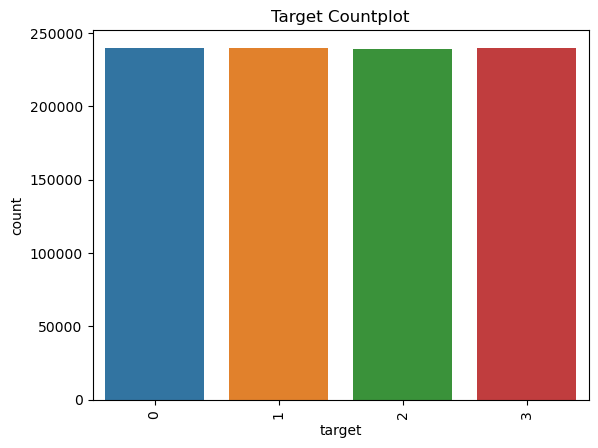

In [111]:
## Visualize target values

sns.countplot(data = df ,x = "target" ,)
plt.title("Target Countplot")
plt.xticks(rotation = 90);

<Axes: >

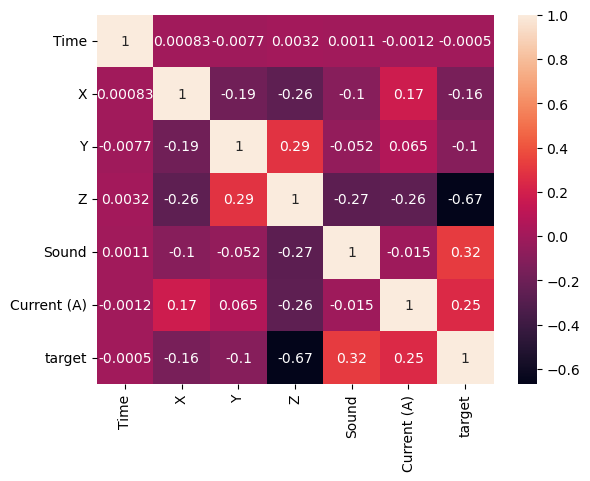

In [112]:
## Check for correlation between classes
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True) ,annot = True)

In [113]:
## check the correlation between features
df.corr(numeric_only=True)["target"].sort_values(ascending=False)[1:]

Sound          0.320760
Current (A)    0.245597
Time          -0.000497
Y             -0.103531
X             -0.158062
Z             -0.668847
Name: target, dtype: float64

In [114]:
# sns.pairplot(data = df ,hue = "target")


---
# Split the Data in train test split



In [115]:
from sklearn.model_selection import train_test_split

In [117]:
shuffled_df = df.sample(frac=1).reset_index(drop=True)

x = shuffled_df.drop(["target","Time"] ,axis = 1)
y = shuffled_df["target"]

x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.05 ,random_state=42)

---

# Model Training 

In [118]:
from sklearn.svm import SVC

In [119]:
model = SVC()

In [120]:
model.fit(x_train,y_train)

SVC()

In [121]:
model.score(x_test,y_test)

0.9986855557178326

---
# Model evaluation

In [122]:
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report, ConfusionMatrixDisplay

In [123]:
y_preds = model.predict(x_test)
y_preds

array([3, 2, 3, ..., 3, 3, 3], dtype=int64)

In [124]:
accuracy = accuracy_score(y_test, y_preds)
print(f'Accuracy: {accuracy:.2f}')

# Calculate additional classification metrics
report = classification_report(y_test, y_preds)
print('Classification Report:\n', report)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11969
           1       1.00      1.00      1.00     11877
           2       1.00      1.00      1.00     11985
           3       1.00      1.00      1.00     12098

    accuracy                           1.00     47929
   macro avg       1.00      1.00      1.00     47929
weighted avg       1.00      1.00      1.00     47929



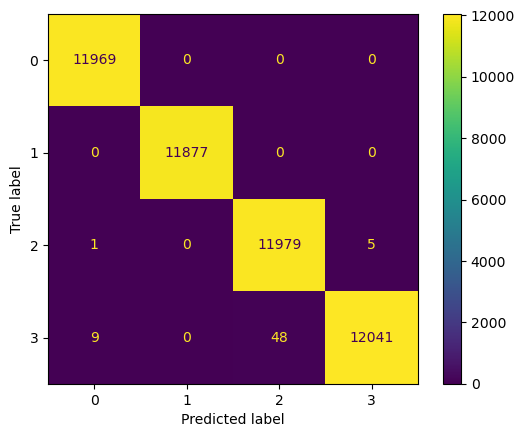

In [125]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_preds)).plot()

---
## Saving the model

In [126]:
import joblib
joblib.dump((model,dict) ,"trainedModel.pkl" )

['trainedModel.pkl']

# The model is performing wonderfully with approximately 100 percent accuracy

---
# Model deployment

In [127]:
import joblib 

trainedModel,dictValue = joblib.load("./trainedModel.pkl")
dictValue

{'modified_ball_fault': 0,
 'modified_healthy': 1,
 'modified_inner_race_faullt': 2,
 'modified_outer_race_fault': 3}

In [128]:
## Create a dictionary of clases
dictVal = {j:i for i,j in dictValue.items()}
dictVal

{0: 'modified_ball_fault',
 1: 'modified_healthy',
 2: 'modified_inner_race_faullt',
 3: 'modified_outer_race_fault'}

In [96]:
#### Get input values
X = float(input("X value: "))
Y = float(input("Y value: "))
Z = float(input("Z value: "))
Sound = float(input("Sound value: "))
Current = float(input("Current (A) value: " ))

# Create a DataFrame with input values
data = {"X": [X], "Y": [Y], "Z": [Z], "Sound": [Sound] ,"Current (A)": [Current]}
df0 = pd.DataFrame(data)

# Display the Prediction
prediction = trainedModel.predict(df0)
print( "\nThe fault is : " ,dictVal[prediction[0]] )


X value: -0.001424
Y value: 0.015238	
Z value: 0.025438
Sound value: 0.005937
Current (A) value: 0.030078

The fault is :  modified_ball_fault


df

In [100]:
## check original data
df.iloc[0]

Time                      6.296115
X                        -0.001424
Y                         0.015238
Z                         0.025438
Sound                     0.005937
Current (A)               0.030078
target         modified_ball_fault
Name: 0, dtype: object